In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import latexStrings as ls
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Data/wine.csv")
df

,Type,Malic_acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenoles,Flavanoides,Non_Flavanoides_Phenoles,Proanthocyanins,Color_intensity,Hue,OD280,OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


Analisis exploratorio inicial (medias, varianzas, correlaciones)

In [3]:
#?

Estandarizamos los datos

In [4]:
for col in df.columns[1:]:
    mu = np.mean(df[col])
    sigma = np.std(df[col])
    df[col] = df[col].apply(lambda x: (x-mu)/sigma)
df

,Type,Malic_acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenoles,Flavanoides,Non_Flavanoides_Phenoles,Proanthocyanins,Color_intensity,Hue,OD280,OD315,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,1,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


Tomamos una muestra de de aproximadamente el 80% para hacer nuestro analisis. El resto se utilizara para probar la prediccion del modelo generado.

In [5]:
#pon tu cu si quieres, o quita la semilla
np.random.seed(155766)
mask = np.random.uniform(0, 1, len(df)) < 0.8
train = df[mask]
test = df[~mask]
len(train)

149

Hacemos un PCA hasta 90% de la varianza con los datos de entrenamiento estandarizados

In [6]:
# Analisis en componentes principales
pca = PCA(0.90)
X_train = pca.fit_transform(train.iloc[:, 1:].values)
#-1 para que sean 0, 1, 2
train_labels = train.iloc[:,0].values-1
Var_C = pca.explained_variance_ratio_
C = pca.components_
sum(Var_C)

0.9215145208064034

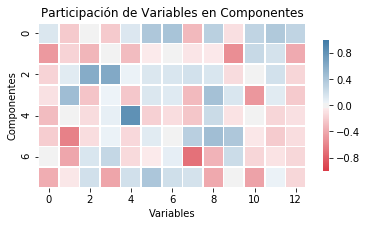

In [7]:
# Grafica departicipacion de variables en componentes
plt.title("Participación de Variables en Componentes")
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(C, cmap=cmap, vmin=-1, vmax=1,
            linewidths=.5, cbar_kws={"shrink": .6},
            xticklabels=2, yticklabels=2,
            square=True)
plt.xlabel("Variables")
plt.ylabel("Componentes")
plt.show()

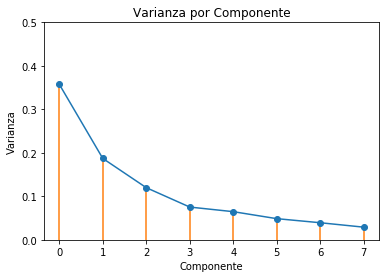

In [8]:
# Grafica de varianza acumulada
plt.title("Varianza por Componente")
plt.xlabel("Componente")
plt.ylabel("Varianza")
plt.ylim([0, 0.5])
plt.plot(range(len(Var_C)), Var_C, "-o")
plt.vlines(range(len(Var_C)), 0, Var_C, "tab:orange")
plt.show()

Grafica de Regiones a 2 componentes

Trasmformacion aplicada a datos de Test

In [9]:
X_test = pca.transform(test.iloc[:,1:].values)
test_labels = test.iloc[:,0].values-1

Grafica de regiones a 2 componentes de datos en test

Clustering por K-Means a 3 clusters

In [11]:
# 3 grupos, centros iniciales aleatorios, tomando el mejor de 10 corridas con semilla 155766 (sklearn tiene un 
# modo que se llama k-means++ que se supone converge mas rapido)
kmeans = KMeans(3, 'random', 10, random_state=155766).fit(X_train)

Grafica de regiones a 2 componentes con nueva claisficacion

Matriz de "matches" entre grupos (i.e. cada renglon representa una region nueva, y cada columna una region vieja. La entrada i,j significa el numero de observaciones en la nueva region i que originalmente eran de la region j)

In [12]:
M = np.zeros((3,3))

for i,j in zip(kmeans.labels_,train_labels):
    M[i, j] += 1
M

array([[ 0., 51.,  0.],
       [50.,  3.,  0.],
       [ 0.,  5., 40.]])

In [13]:
# Reordenando para que quede diagonal
print(ls.latexMatrix(M[:,[1,0,2]], "",eq=False))

\begin{pmatrix} 
51 & 0 & 0 \\ 
3 & 50 & 0 \\ 
5 & 0 & 40 \\ 
\end{pmatrix}


Prediccion de Datos en Test (Diagonal = correcto)

In [15]:
kmeans.predict(X_test)
M = np.zeros((3,3))

for i,j in zip(kmeans.predict(X_test),test_labels):
    M[i, j] += 1
print(ls.latexMatrix(M[:,[1,0,2]], "",eq=False))

\begin{pmatrix} 
11 & 0 & 0 \\ 
0 & 9 & 0 \\ 
1 & 0 & 8 \\ 
\end{pmatrix}


Clustering Jerarquico utilizando la regla de minima distancia maxima

Grafica de regiones a 2 componentes con nueva claisficacion

Matriz de "matches" entre grupos

Clustering Jerarquico utilizando la regla de *Wards* (minimiza suma de diferencias cuadradas entre todos los clusters)

Grafica de regiones a 2 componentes con nueva claisficacion

Matriz de "matches" entre grupos